<a href="https://colab.research.google.com/github/California-State-University-Fullerton/LassaFever_Prediction/blob/main/lassaFever_LABCONFIRMED_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('Lassa_spatialdataset_201219separateyears_labconfirmed.csv')
data_shap = data
data.replace('',np.nan,regex = True)
data = data.dropna()

# Creating LGA names set and then assigning them their indices as values
lga_names = set(data['LGA'])
lga_replace_dict = {value: i for i, value in enumerate(lga_names)}

# Creating Year names set and then assigning them their indices as values
year_names = set(data['Year'])
year_replace_dict = {value: i for i, value in enumerate(year_names)}

# Creating Year names set and then assigning them their indices as values
administration_names = set(data['admin1Name'])
administration_replace_dict = {value: i for i, value in enumerate(administration_names)}

# Creating Year names set and then assigning them their indices as values
source_names = set(data['Source'])
source_replace_dict = {value: i for i, value in enumerate(source_names)}

# copying the raw data before replacing and normalizing
raw_data = data.copy()

# replaces values for string values in dataset
data = data.replace({'LGA':lga_replace_dict, 
                     'Year': year_replace_dict,
                     'admin1Name': administration_replace_dict,
                     'Source': source_replace_dict})

ignore_norm_cols_array = ["Cases","Year", "AgriProp_ESA", "UrbanProp_ESA", "ForestProp_ESA", "TempMonthlyCoefv_201118_NOAA",
                     "TotalPop2015_PropUrban", "ImprovedHousingPrev_PopWeighted", "Cropland_prop_ESA2015",
                     "Agri_prop_ESA2015", "Urb_prop_ESA2015", "Forest_prop_ESA2015", "PovertyProp_Mean",
                     "PovertyProp_PopWeighted"]


for heading in data.columns:  
  if heading not in ignore_norm_cols_array:
    data[heading] = ( data[heading] - ( min(data[heading]) ) ) / ( max(data[heading]) - min(data[heading]) )

# Remove these columns
data = data.loc[:, ~data.columns.isin(['Any_Confirmed_Cases', 'Source', 'x', 'y'])]

# print(data.head())
print(data.columns)

Index(['LGA', 'Year', 'admin1Name', 'Cases', 'Cases_SuspectedUnconfirmed',
       'Reports_All', 'NumDiagCentres', 'LabDist', 'LabTravelTime',
       'TotalPopulation_ByYear', 'AgriProp_ESA', 'UrbanProp_ESA',
       'ForestProp_ESA', 'LGAarea_km2', 'PrecipMeanAnnual_2011_2019_CHIRPS',
       'PrecipMeanWettest_2011_2019_CHIRPS',
       'PrecipMeanDriest_2011_2019_CHIRPS',
       'PrecipMonthlyCoefv_2011_2019_CHIRPS', 'TempMeanAnnual_201119_NOAA',
       'TempMonthlyCoefv_201118_NOAA', 'CHELSA_TempAnnualMean',
       'CHELSA_TempSeasonality', 'CHELSA_TempMeanWarmestQ',
       'CHELSA_PrecipTotalAnnual', 'CHELSA_PrecipSeasonality',
       'CHELSA_PrecipWettestQ', 'CityTravTime_Mean', 'HospitalDist_mean_km',
       'HealthFacilityDist_mean_km', 'TotalPop2015', 'PopDens2015',
       'TotalUrbanPop2015', 'TotalRuralPop2015', 'TotalPop2015_PropUrban',
       'ImprovedHousingPrev_PopWeighted', 'Cropland_prop_ESA2015',
       'Agri_prop_ESA2015', 'Urb_prop_ESA2015', 'Forest_prop_ESA2015',
    

In [ ]:
# !pip install shap

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import shap
# shap.initjs()

In [ ]:
# plt.scatter(data_shap['Year'], data_shap['Cases_SuspectedUnconfirmed'])
# plt.xlabel('Year', size=5)
# plt.xlabel('Cases_SuspectedUnconfirmed', size=5)

<Axes: >

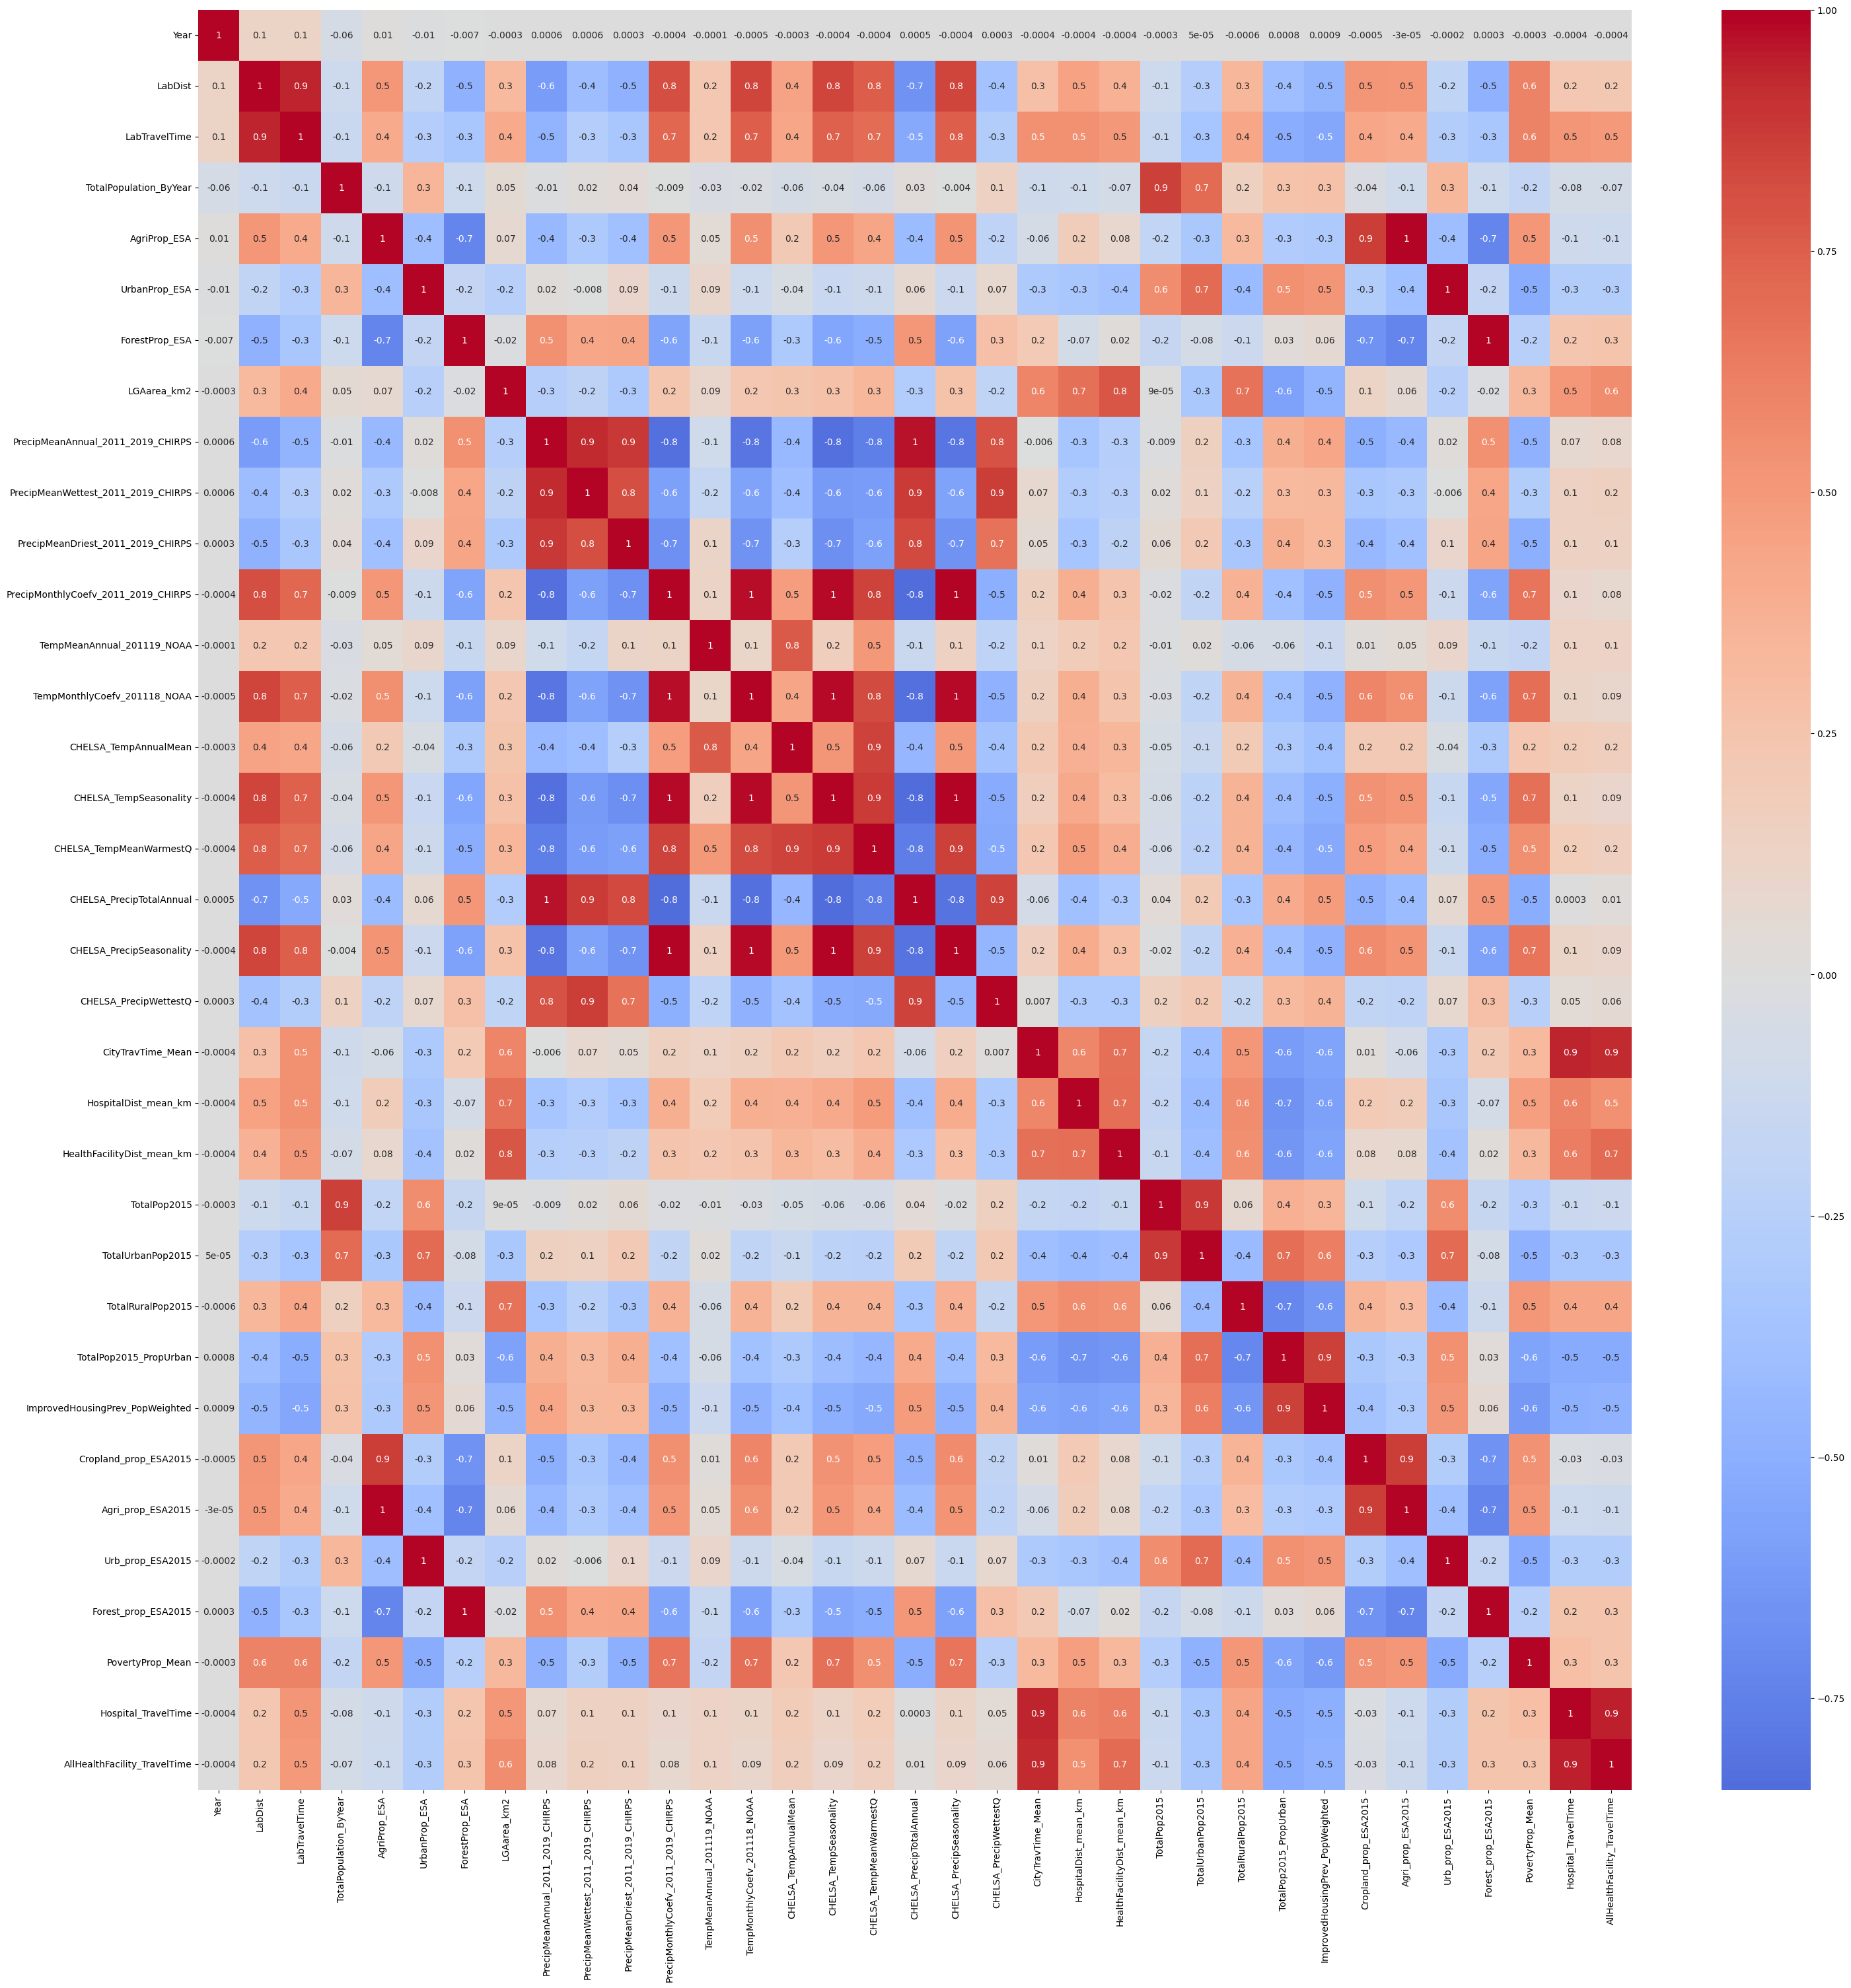

In [ ]:
shap_related_columns = [
                        # 'Year', 'admin1Name', 'Cases', 
                        # 'Cases_SuspectedUnconfirmed', 'Reports_All', 'NumDiagCentres',
                        'Year', 'LabDist', 'LabTravelTime', 'TotalPopulation_ByYear', 'AgriProp_ESA',
                        'UrbanProp_ESA', 'ForestProp_ESA', 'LGAarea_km2',
                        'PrecipMeanAnnual_2011_2019_CHIRPS',
                        'PrecipMeanWettest_2011_2019_CHIRPS',
                        'PrecipMeanDriest_2011_2019_CHIRPS',
                        'PrecipMonthlyCoefv_2011_2019_CHIRPS', 'TempMeanAnnual_201119_NOAA',
                        'TempMonthlyCoefv_201118_NOAA', 'CHELSA_TempAnnualMean',
                        'CHELSA_TempSeasonality', 'CHELSA_TempMeanWarmestQ',
                        'CHELSA_PrecipTotalAnnual', 'CHELSA_PrecipSeasonality',
                        'CHELSA_PrecipWettestQ', 'CityTravTime_Mean', 'HospitalDist_mean_km',
                        'HealthFacilityDist_mean_km', 'TotalPop2015',
                        'TotalUrbanPop2015', 'TotalRuralPop2015', 'TotalPop2015_PropUrban',
                        'ImprovedHousingPrev_PopWeighted', 'Cropland_prop_ESA2015',
                        'Agri_prop_ESA2015', 'Urb_prop_ESA2015', 'Forest_prop_ESA2015',
                        'PovertyProp_Mean', 'Hospital_TravelTime',
                        'AllHealthFacility_TravelTime'
      ]

s_plt = len(shap_related_columns)
fig, ax = plt.subplots(figsize=( s_plt, s_plt )) 

shap_data = data[shap_related_columns]

corr_matrix = pd.DataFrame(shap_data, columns=shap_related_columns).corr()

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center = 0,
            annot=True,
            fmt='.1g')

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
# read data
from sklearn.model_selection import train_test_split

x_data = data[shap_related_columns]
y_data = data[['Year', 'Cases']]
class_n = len(set(y_data['Cases']))

# year labels
year_labels = sorted(list(set(raw_data['Year'])))
print(year_labels)

y1, y2, y3, y4, y5, y6, y7, y8 = 0.0/7.0, 1.0/7.0, 2.0/7.0, 3.0/7.0, 4.0/7.0, 5.0/7.0, 6.0/7.0, 7.0/7.0, 
x_data_12, y_data_12 = x_data[(x_data['Year'] == 0)].copy(), y_data[(y_data['Year'] == 0)]['Cases'].copy()
x_data_13, y_data_13 = x_data[(x_data['Year'] == 1)].copy(), y_data[(y_data['Year'] == 1)]['Cases'].copy()
x_data_14, y_data_14 = x_data[(x_data['Year'] == 2)].copy(), y_data[(y_data['Year'] == 2)]['Cases'].copy()
x_data_15, y_data_15 = x_data[(x_data['Year'] == 3)].copy(), y_data[(y_data['Year'] == 3)]['Cases'].copy()
x_data_16, y_data_16 = x_data[(x_data['Year'] == 4)].copy(), y_data[(y_data['Year'] == 4)]['Cases'].copy()
x_data_17, y_data_17 = x_data[(x_data['Year'] == 5)].copy(), y_data[(y_data['Year'] == 5)]['Cases'].copy()
x_data_18, y_data_18 = x_data[(x_data['Year'] == 6)].copy(), y_data[(y_data['Year'] == 6)]['Cases'].copy()
x_data_19, y_data_19 = x_data[(x_data['Year'] == 7)].copy(), y_data[(y_data['Year'] == 7)]['Cases'].copy()


X_train12, X_test12, y_train12, y_test12 = train_test_split(x_data_12, y_data_12, test_size=0.2)
X_train13, X_test13, y_train13, y_test13 = train_test_split(x_data_13, y_data_13, test_size=0.2)
X_train14, X_test14, y_train14, y_test14 = train_test_split(x_data_14, y_data_14, test_size=0.2)
X_train15, X_test15, y_train15, y_test15 = train_test_split(x_data_15, y_data_15, test_size=0.2)
X_train16, X_test16, y_train16, y_test16 = train_test_split(x_data_16, y_data_16, test_size=0.2)
X_train17, X_test17, y_train17, y_test17 = train_test_split(x_data_17, y_data_17, test_size=0.2)
X_train18, X_test18, y_train18, y_test18 = train_test_split(x_data_18, y_data_18, test_size=0.2)
X_train19, X_test19, y_train19, y_test19 = train_test_split(x_data_19, y_data_19, test_size=0.2)

bst12 = XGBClassifier(n_estimators=len(set(y_train12)), learning_rate=0.01)
# fit model
y_train_train = y_train12
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst12.fit(X_train12, y_train_train)
# make predictions
preds = bst12.predict(X_test12)
print(len(X_test12), len(preds))

scores = list()
ss = bst12.score(X_test12, y_test12)
scores.append(ss)
print("Accuracy for year ", year_labels[0], " : ", ss)

f1scores = list()
f1 = f1_score(y_test12, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
111 111
Accuracy for year  2012  :  0.918918918918919
F1 Score :  0.9058537210195978


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2012 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2012.fit(X_train12, y_train_train)

rf_preds = randFC_2012.predict(X_train12)
print("Accuracy: ", randFC_2012.score(X_test12, y_test12))
f1 = f1_score(y_test12, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.9459459459459459
F1 Score :  0.9058537210195978


In [ ]:
bst13 = XGBClassifier(n_estimators=len(set(y_train13)), learning_rate=0.01)
print(len(set(y_train13)))
y_train_train = y_train13
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst13.fit(X_train13, y_train_train)
# make predictions
preds = bst13.predict(X_test13)
ss = bst13.score(X_test13, y_test13)
scores.append(ss)
print("Accuracy for year ", year_labels[1], " : ", ss)
f1 = f1_score(y_test13, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

7
Accuracy for year  2013  :  0.8738738738738738
F1 Score :  0.8234580734580734


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2013 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2013.fit(X_train13, y_train_train)

rf_preds = randFC_2013.predict(X_train13)
print("Accuracy: ", randFC_2013.score(X_test13, y_test13))
f1 = f1_score(y_test13, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.8738738738738738
F1 Score :  0.8234580734580734


In [ ]:
bst14 = XGBClassifier(n_estimators=len(set(y_train14)), learning_rate=0.01)
print(len(set(y_train14)))
y_train_train = y_train14
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst14.fit(X_train14, y_train_train)
# make predictions
preds = bst14.predict(X_test14)
ss = bst14.score(X_test14, y_test14)
scores.append(ss)
print("Accuracy for year ", year_labels[2], " : ", ss)
f1 = f1_score(y_test14, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

14
Accuracy for year  2014  :  0.9009009009009009
F1 Score :  0.8539345032236026


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2014 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2014.fit(X_train14, y_train_train)

rf_preds = randFC_2014.predict(X_train14)
print("Accuracy: ", randFC_2014.score(X_test14, y_test14))
f1 = f1_score(y_test14, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.8918918918918919
F1 Score :  0.8539345032236026


In [ ]:
bst15 = XGBClassifier(n_estimators=len(set(y_train15)), learning_rate=0.01)
y_train_train = y_train15
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst15.fit(X_train15, y_train_train)
# make predictions
preds = bst15.predict(X_test15)
ss = bst15.score(X_test15, y_test15)
scores.append(ss)
print("Accuracy for year ", year_labels[3], " : ", ss)
f1 = f1_score(y_test15, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

Accuracy for year  2015  :  0.8828828828828829
F1 Score :  0.8404365904365905


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2015 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2015.fit(X_train15, y_train_train)

rf_preds = randFC_2015.predict(X_train15)
print("Accuracy: ", randFC_2015.score(X_test15, y_test15))
f1 = f1_score(y_test15, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.8828828828828829
F1 Score :  0.8404365904365905


In [ ]:
bst16 = XGBClassifier(n_estimators=len(set(y_train16)), learning_rate=0.01)
y_train_train = y_train16
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst16.fit(X_train16, y_train_train)
# make predictions
preds = bst16.predict(X_test16)
ss = bst16.score(X_test16, y_test16)
scores.append(ss)
print("Accuracy for year ", year_labels[4], " : ", ss)
f1 = f1_score(y_test16, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

Accuracy for year  2016  :  0.972972972972973
F1 Score :  0.9596445760829322


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2016 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2016.fit(X_train16, y_train_train)

rf_preds = randFC_2016.predict(X_train15)
print("Accuracy: ", randFC_2016.score(X_test16, y_test16))
f1 = f1_score(y_test16, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.972972972972973
F1 Score :  0.9596445760829322


In [ ]:
bst17 = XGBClassifier(n_estimators=len(set(y_train17)), learning_rate=0.01)
y_train_train = y_train16
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst17.fit(X_train17, y_train_train)
# make predictions
preds = bst17.predict(X_test17)
ss = bst17.score(X_test17, y_test17)
scores.append(ss)
print("Accuracy for year ", year_labels[5], " : ", ss)
f1 = f1_score(y_test17, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

Accuracy for year  2017  :  0.9819819819819819
F1 Score :  0.9730548730548729


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2017 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2017.fit(X_train17, y_train_train)

rf_preds = randFC_2017.predict(X_train17)
print("Accuracy: ", randFC_2017.score(X_test17, y_test17))
f1 = f1_score(y_test17, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.9819819819819819
F1 Score :  0.9730548730548729


In [ ]:
bst18 = XGBClassifier(n_estimators=len(set(y_train18)), learning_rate=0.01)
y_train_train = y_train18
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst18.fit(X_train18, y_train_train)
# make predictions
preds = bst18.predict(X_test18)
ss = bst18.score(X_test18, y_test18)
scores.append(ss)
print("Accuracy for year ", year_labels[6], " : ", ss)
f1 = f1_score(y_test18, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

Accuracy for year  2018  :  0.972972972972973
F1 Score :  0.9596445760829322


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2018 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2018.fit(X_train18, y_train_train)

rf_preds = randFC_2018.predict(X_train18)
print("Accuracy: ", randFC_2018.score(X_test18, y_test18))
f1 = f1_score(y_test18, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  0.972972972972973
F1 Score :  0.9596445760829322


In [ ]:
bst19 = XGBClassifier(n_estimators=len(set(y_train19)), learning_rate=0.01)
y_train_train = y_train19
y_replace = [i for i, j in enumerate(set(y_train_train))]
y_replacement = {i:val for i,val in zip(set(y_train_train), y_replace)}
y_train_train = y_train_train.replace(y_replacement)
bst19.fit(X_train19, y_train_train)
# make predictions
preds = bst19.predict(X_test19)
ss = bst19.score(X_test19, y_test19)
scores.append(ss)
print("Accuracy for year ", year_labels[7], " : ", ss)
f1 = f1_score(y_test19, preds, average='weighted')
f1scores.append(f1)
print("F1 Score : ", f1)

Accuracy for year  2019  :  1.0
F1 Score :  1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randFC_2019 = RandomForestClassifier(max_depth=8, random_state=0)
randFC_2019.fit(X_train19, y_train_train)

rf_preds = randFC_2019.predict(X_train19)
print("Accuracy: ", randFC_2019.score(X_test19, y_test19))
f1 = f1_score(y_test19, preds, average='weighted')
print("F1 Score : ", f1)

Accuracy:  1.0
F1 Score :  1.0


[0.918918918918919, 0.8738738738738738, 0.9009009009009009, 0.8828828828828829, 0.972972972972973, 0.9819819819819819, 0.972972972972973, 1.0]


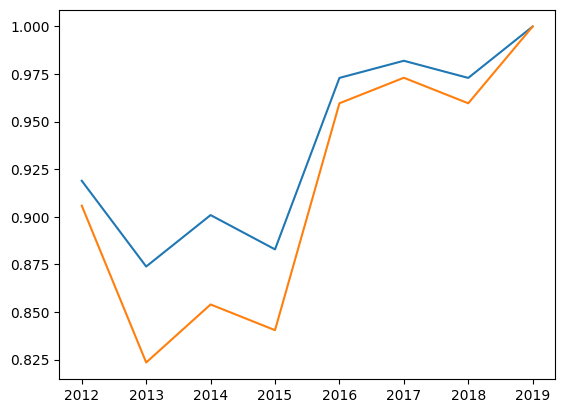

In [ ]:
print(scores)
plt.plot(year_labels, scores, label='Scores')
plt.plot(year_labels, f1scores, label='F1')